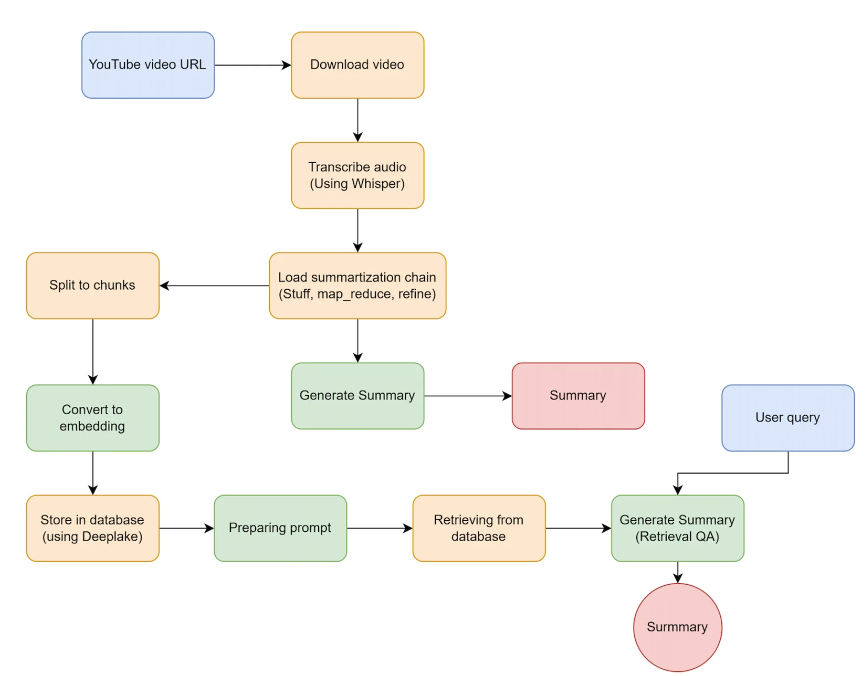

In [5]:
!pip install pytube


In [6]:
! pip install git+https://github.com/openai/whisper.git
! pip install jiwer

  Cloning https://github.com/openai/whisper.git to c:\users\eddy.tovar\appdata\local\temp\pip-req-build-aa7_6ac4
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git 'C:\Users\Eddy.Tovar\AppData\Local\Temp\pip-req-build-aa7_6ac4'


JiWER is a simple and fast python package to evaluate an automatic speech recognition system.

In [7]:
from dotenv import load_dotenv
import os

load_dotenv()
os.environ['OPENAI_API_KEY'] = os.environ.get('OPENAI_API_KEY')
os.environ['ACTIVELOOP_TOKEN'] = os.environ.get('ACTIVELOOP_TOKEN')

In [8]:
from pytube import YouTube

In [24]:
link='https://www.youtube.com/watch?v=mBjPyte2ZZo'
ile_link= "https://www.youtube.com/watch?v=eK3FVZZtqqs&t=3s"

In [25]:
try:
    # object creation using YouTube
    yt = YouTube(ile_link)
except:
    print("Connection Error")

In [26]:
yt.streams.filter(file_extension='mp4')

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="25fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="25fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="25fps" vcodec="avc1.4d4015" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="25fps" vcodec="avc1.4d400c" progressive="False" type="video

In [27]:
stream = yt.streams.get_by_itag(139)

In [28]:
stream.download('',"ile.mp4")

'c:\\Users\\Eddy.Tovar\\Documents\\Datos\\work\\PycharmProjects\\proyectos_personales\\cursos_llm\\activeloop_langchain_vector\\Projects\\yt-whisper\\ile.mp4'

In [31]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("ile.mp4")
print(result['text'])

 ¡Helo bienvenidos una vez más a mi canal pequeña familia como cariñosamente! Yo les digo, yo estuve en un lugar que me encanta y me pareció el sitio perfecto para hacerles un bidet como el que les quiero hacer hoy. Hoy les tengo un bidet diferente, más bien un bidet que yo nunca las había hecho por aquí y bueno ya llevo cuatro años aproximadamente viviendo aquí en España y hace algunos necesitos decidir abrirme este espacio que tanta ilusión me hace para compartir las cosas bonitas de mi vida y las no tan bonitas y dije, hoy no tengo un bidet en mi canal sobre las cosas que más me gustan de este increíble país y mira que son muchas pero creo que voy a decir aproximadamente 6 porque voy a resumir porque si no se me puede hacer un vídeo de una hora si yo en pienso decir todas las cosas que me han enamorado de este famoso país como mismo hablo de España con tanto cariño creo que podía haber hablado igual de no sé de Perú porque yo desde que me fui de Cuba tenía muy claro que yo era la qu

we got the result in a form of a raw text

In [32]:
with open ('text_ile.txt', 'w') as file:
    file.write(result['text'])

In [33]:
from langchain import LLMChain
from langchain_openai import OpenAI
from langchain.chains.mapreduce import MapReduceChain
from langchain.prompts import PromptTemplate
from langchain.chains.summarize import load_summarize_chain

llm = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0)


creates an instance of the RecursiveCharacterTextSplitter
 class, which is responsible for splitting input text into smaller chunks. 

In [34]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=0, separators=[" ", ",", "\n"]
)

In [35]:
with open('text_ile.txt') as f:
    text = f.read()
texts = text_splitter.split_text(text)

In [38]:
texts

['¡Helo bienvenidos una vez más a mi canal pequeña familia como cariñosamente! Yo les digo, yo estuve en un lugar que me encanta y me pareció el sitio perfecto para hacerles un bidet como el que les quiero hacer hoy. Hoy les tengo un bidet diferente, más bien un bidet que yo nunca las había hecho por aquí y bueno ya llevo cuatro años aproximadamente viviendo aquí en España y hace algunos necesitos decidir abrirme este espacio que tanta ilusión me hace para compartir las cosas bonitas de mi vida y las no tan bonitas y dije, hoy no tengo un bidet en mi canal sobre las cosas que más me gustan de este increíble país y mira que son muchas pero creo que voy a decir aproximadamente 6 porque voy a resumir porque si no se me puede hacer un vídeo de una hora si yo en pienso decir todas las cosas que me han enamorado de este famoso país como mismo hablo de España con tanto cariño creo que podía haber hablado igual de no sé de Perú porque yo desde que me fui de Cuba tenía muy claro que yo era la',

In [39]:
from langchain.docstore.document import Document

docs = [Document(page_content=t) for t in texts[:4]]

In [40]:
docs

[Document(page_content='¡Helo bienvenidos una vez más a mi canal pequeña familia como cariñosamente! Yo les digo, yo estuve en un lugar que me encanta y me pareció el sitio perfecto para hacerles un bidet como el que les quiero hacer hoy. Hoy les tengo un bidet diferente, más bien un bidet que yo nunca las había hecho por aquí y bueno ya llevo cuatro años aproximadamente viviendo aquí en España y hace algunos necesitos decidir abrirme este espacio que tanta ilusión me hace para compartir las cosas bonitas de mi vida y las no tan bonitas y dije, hoy no tengo un bidet en mi canal sobre las cosas que más me gustan de este increíble país y mira que son muchas pero creo que voy a decir aproximadamente 6 porque voy a resumir porque si no se me puede hacer un vídeo de una hora si yo en pienso decir todas las cosas que me han enamorado de este famoso país como mismo hablo de España con tanto cariño creo que podía haber hablado igual de no sé de Perú porque yo desde que me fui de Cuba tenía muy

In [58]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

chain = load_summarize_chain(llm, chain_type="map_reduce")

output_summary = chain.invoke(docs)
wrapped_text = textwrap.fill(output_summary['output_text'], width=100)
print(wrapped_text)

  The speaker welcomes their audience and shares their love for a recent trip. They discuss their
experience living in Spain for four years and express their excitement for sharing both positive and
negative aspects. They mention six things they love about Spain, including the food and welcoming
atmosphere. The speaker also talks about their experience of moving to Spain and adjusting to the
culture, as well as the opportunity to travel and explore different cultures within Europe. They
highlight the diversity of Spanish cuisine and the accessibility of travel options within the
country.


In [48]:
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

The "stuff" approach is the simplest and most naive one, in which all the text from the transcribed video is used in a single prompt. This method may raise exceptions if all text is longer than the available context size of the LLM and may not be the most efficient way to handle large amounts of text. 

We’re going to experiment with the prompt below. This prompt will output the summary as bullet points.

In [49]:
chain = load_summarize_chain(llm, chain_type="stuff")

In [54]:
prompt_template = """Write a concise bullet point summary in spanish of the following:


{text}


CONSCISE SUMMARY IN BULLET POINTS: """

BULLET_POINT_PROMPT = PromptTemplate(template=prompt_template,
                        input_variables=["text"])

In [55]:
chain = load_summarize_chain(llm,
                             chain_type="stuff",
                             prompt=BULLET_POINT_PROMPT)

output_summary = chain.invoke(docs)

wrapped_text = textwrap.fill(output_summary['output_text'],
                             width=2000,
                             break_long_words=False,
                             replace_whitespace=False)
print(wrapped_text)



- Canal de YouTube dedicado a compartir experiencias en España
- Hoy se hablará sobre las cosas que más le gustan del país
- Lleva 4 años viviendo en España y decidió abrir un espacio para compartir su vida
- La gastronomía es deliciosa y varía según la región
- La oportunidad de viajar y conocer diferentes lugares de España y Europa
- La diversidad cultural y las posibilidades de viajar para todos los bolsillos


In LangChain we have the flexibility to create custom prompts tailored to specific needs. For instance, if you want the summarization output in French, you can easily construct a prompt that guides the language model to generate a summary in the desired language.

The 'refine' summarization chain is a method for generating more accurate and context-aware summaries. This chain type is designed to iteratively refine the summary by providing additional context when needed. That means: it generates the summary of the first chunk. Then, for each successive chunk, the work-in-progress summary is integrated with new info from the new chunk

In [60]:
chain = load_summarize_chain(llm, chain_type="refine")

output_summary = chain.run(docs)
wrapped_text = textwrap.fill(output_summary, width=100)
print(wrapped_text)

  The speaker welcomes their audience to their channel and shares their love for a place they
recently visited. They then introduce a new topic, discussing their experience living in Spain for
four years and their excitement for sharing the good and not-so-good aspects of their life there.
They mention wanting to talk about 6 things they love about Spain, but will summarize to avoid
making a long video. The speaker expresses their love for Spain and mentions they could have spoken
the same way about their home country of Peru. They also mention the importance of being open and
receptive when moving to a new country, but express that Spain has made it easy for them with its
incredible food and welcoming people. They then list the six things they love most about Spain,
starting with its delicious and diverse gastronomy. They also mention the opportunity to travel and
explore different cultures within Spain and Europe, which has been made possible by living in Spain.
The speaker also high

## Adding Transcripts to Deep Lake

In [68]:
import yt_dlp

videos = []

def download_mp4_from_youtube(urls, job_id):
    # This will hold the titles and authors of each downloaded video
    video_info = []

    for i, url in enumerate(urls):
        # Set the options for the download
        yt = YouTube(url)
        stream = yt.streams.get_by_itag(139)
        # Download the video file
        stream.download('', f"video_{i}.mp4")
        video_info.append(f"video_{i}.mp4")
    return video_info

urls=["https://www.youtube.com/watch?v=mBjPyte2ZZo&t=78s",
    "https://www.youtube.com/watch?v=cjs7QKJNVYM",]

vides_details = download_mp4_from_youtube(urls, 1)

In [72]:
import whisper

# load the model
model = whisper.load_model("base")

# iterate through each video and transcribe
results = []
for video in vides_details:
    print(video)
    result = model.transcribe(video)
    results.append( result['text'] )
    print(f"Transcription for {video[0]}:\n{result['text']}\n")

with open ('text_deeplake.txt', 'w') as file:
    file.write(results['text'])

video_0.mp4


c:\Users\Eddy.Tovar\Documents\Datos\work\PycharmProjects\proyectos_personales\cursos_llm\activeloop_langchain_vector\venv\lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


KeyboardInterrupt: 

### Splitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Load the texts
with open('text.txt') as f:
    text = f.read()
texts = text_splitter.split_text(text)

# Split the documents
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=0, separators=[" ", ",", "\n"]
    )
texts = text_splitter.split_text(text)

### Into Documents

In [21]:
from langchain.docstore.document import Document

docs = [Document(page_content=t) for t in texts[:4]]

### To DeepLake

In [22]:
from langchain.vectorstores import DeepLake
from langchain.embeddings.openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "<YOUR-ACTIVELOOP-ORG-ID>"
my_activeloop_dataset_name = "langchain_course_youtube_summarizer"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"

db = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)
db.add_documents(docs)

c:\Users\Eddy.Tovar\Documents\Datos\work\PycharmProjects\proyectos_personales\cursos_llm\activeloop_langchain_vector\venv\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.23) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
c:\Users\Eddy.Tovar\Documents\Datos\work\PycharmProjects\proyectos_personales\cursos_llm\activeloop_langchain_vector\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(
Using embedding function is deprecated and will be removed in the futu

KeyboardInterrupt: 

## Retriever

The distance metric determines how the Retriever measures "distance" or similarity between different data points in the database. By setting distance_metric to 'cos', the Retriever will use cosine similarity as its distance metric. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It's often used in information retrieval to measure the similarity between documents or pieces of text. Also, by setting 'k' to 4, the Retriever will return the 4 most similar or closest results according to the distance metric when a search is performed.

In [ ]:
retriever = db.as_retriever()
retriever.search_kwargs['distance_metric'] = 'cos'
retriever.search_kwargs['k'] = 4

We can construct and use a custom prompt template with the QA chain. The RetrievalQA chain is useful to query similiar contents from databse and use the returned records as context to answer questions. The custom prompt ability gives us the flexibility to define custom tasks like retrieving the documents and summaizing the results in a bullet-point style.

In [ ]:
from langchain.prompts import PromptTemplate
prompt_template = """Use the following pieces of transcripts from a video to answer the question in bullet points and summarized. If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Summarized answer in bullter points:"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

Lastly, we can use the chain_type_kwargs argument to define the custom prompt and for chain type the ‘stuff’  variation was picked. You can perform and test other types as well, as seen previously.

In [ ]:
from langchain.chains import RetrievalQA

chain_type_kwargs = {"prompt": PROMPT}
qa = RetrievalQA.from_chain_type(llm=llm,
                                 chain_type="stuff",
                                 retriever=retriever,
                                 chain_type_kwargs=chain_type_kwargs)

print( qa.run("Summarize the mentions of google according to their AI program") )